In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display as print_dataframe

## Exercício 1

Leia os arquivos `fifa19_info.csv` e o arquivo `fifa19_stats.csv` e realize os seguintes cáculos sobre o conjunto de dados:

1. Calcule a média de agilidade dos jogadores do Barcelona e do Real Madrid.
2. Faça um gráfico de barras com os top 10 clubes de acordo com a soma de valor seus jogadores.
3. Mostre os top 5 países que mais possuem jogadores no conjunto de dados.
4. Mostre a foto (virtual e real) dos top 5 jogadores de acordo com a habilidade absoluta (Overall).
5. Mostre qual é o jogador mais velho e mais novo.
6. Faça um gráfico de dispersão que contém o top 10 jogadores de acordo com a habilidade absoluta (Overall) no eixo X e sua habilidade em bater pênaltis (Penalties) no eixo y.
7. Mostre qual o clube que contém, em média, os melhores batedores de pênalti.
8. Mostre qual o clube que contém, em média, os jogadores mais caros.
9. Faça um [gráfico de radar](https://matplotlib.org/examples/api/radar_chart.html) dos Jogadores `L. Messi`, `Sergio Ramos` e `De Gea`. Utilize os atributos `Balance`, `Stamina`, `ShotPower`, `Marking`, `Dribling`, `SprintSpeed`, `Strength`, `SlidingTackle` e `GKReflexes`. Verifique o intervalo dos dados, talvez seja necessário normalizar.

In [2]:
########################
# Inicio do seu codigo #
########################
def parse_value(value):
    value = value.replace('€', '')
    if 'K' in value:
        value = value.replace('K', '')
        value = float(value) * 1000
    elif 'M' in value:
        value = value.replace('M', '')
        value = float(value) * 1000000
    return value


df_info = pd.read_csv('fifa19_info.csv', index_col=0)
df_stats = pd.read_csv('fifa19_stats.csv', index_col=0)

df = df_info.join(df_stats, how='inner')
df['Value'] = df['Value'].apply(parse_value).astype(np.float32)
print(sorted(df.columns))

########################
#   Fim do seu codigo  #
########################

['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Club', 'Club Logo', 'Composure', 'Contract Valid Until', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy', 'Finishing', 'Flag', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Height', 'Interceptions', 'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From', 'LongPassing', 'LongShots', 'Marking', 'Name', 'Nationality', 'Overall', 'Penalties', 'Photo', 'Position', 'Positioning', 'Potential', 'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause', 'ST', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle', 'Special', 'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Value', 'Vision', 'Volleys', 'Wage', 'Weak Foot', 'Weight', 'Work Rate']


In [3]:
df_grouped_by_club = df.groupby('Club')
df_club_mean = df_grouped_by_club.mean()

# print_dataframe(df.head(10))
print('1. A média de agilidade do jogadores do Barcelona é {:.2f} e do Real Madrid é {:.2f}'.format(
        df_club_mean.loc['FC Barcelona']['Agility'], df_club_mean.loc['Real Madrid']['Agility']))

1. A média de agilidade do jogadores do Barcelona é 69.21 e do Real Madrid é 68.76


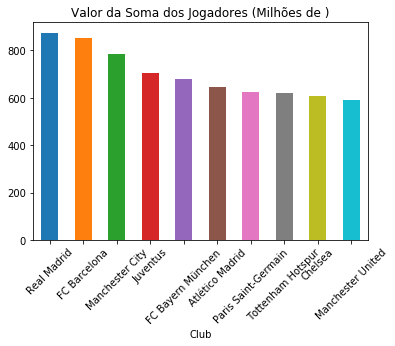

In [4]:
df_grouped_by_club = df.groupby('Club')
df_club_sum = df_grouped_by_club.sum()
sorted_club_value = df_club_sum.sort_values('Value', ascending=False)['Value'][:10] / 1000000
sorted_club_value.plot.bar()
plt.title('Valor da Soma dos Jogadores (Milhões de )')
plt.xticks(rotation=45)
plt.show()

In [5]:
country_count = df['Nationality'].value_counts(sort=True, ascending=False)[:10]
print('Os países que mais possuem jogadores no dataset são:')
for i, (index, value) in enumerate(country_count.items()):
    print('\t{} - {} possuí {:,} jogares'.format(i+1, index, value))



Os países que mais possuem jogadores no dataset são:
	1 - England possuí 1,662 jogares
	2 - Germany possuí 1,198 jogares
	3 - Spain possuí 1,072 jogares
	4 - Argentina possuí 937 jogares
	5 - France possuí 914 jogares
	6 - Brazil possuí 827 jogares
	7 - Italy possuí 702 jogares
	8 - Colombia possuí 618 jogares
	9 - Japan possuí 478 jogares
	10 - Netherlands possuí 453 jogares


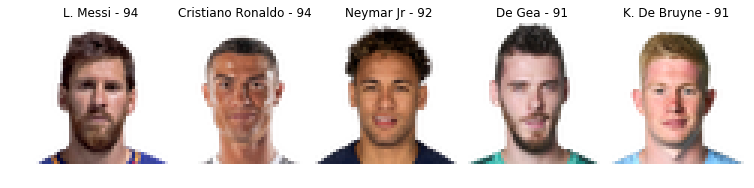

In [6]:
from urllib.request import Request, urlopen
import io
from PIL import Image

def get_image(url):
    req = Request(url,
              headers={'User-Agent': 'Mozilla/5.0'})
    image_bytes = urlopen(req).read()
    image = Image.open(io.BytesIO(image_bytes))
    return image


df_sorted = df.sort_values('Overall', ascending=False)[:5]

data = []
for index, row in df_sorted.iterrows():
    image = get_image(row['Photo'])
    data.append(('{} - {}'.format(row['Name'], row['Overall']), image))


fig, axes = plt.subplots(1, len(data), figsize=(10, 50),sharex=True, sharey=True)
for i, ax in zip(range(len(data)), axes.flatten()):
    name, image = data[i]
    ax.imshow(image, aspect='equal')
    ax.text(image.width/2, -1.5, name, horizontalalignment='center', fontsize=12)
    ax.set_axis_off()
plt.subplots_adjust(bottom=0, top=1, left=0, right=1, wspace=0, hspace=0)
plt.show()

In [7]:
# existem vários jogares com a idade mínima e máxima, vamos simplesmente pegar a primeira ocorrência
min_record = df.loc[df['Age'].idxmin()]
print('O jogador mais novo do dataset é {} e tem {} anos.'.format(min_record['Name'], min_record['Age']))
max_record = df.loc[df['Age'].idxmax()]
print('O jogador mais novo do dataset é {} e tem {} anos.'.format(max_record['Name'], max_record['Age']))

O jogador mais novo do dataset é W. Geubbels e tem 16 anos.
O jogador mais novo do dataset é O. Pérez e tem 45 anos.


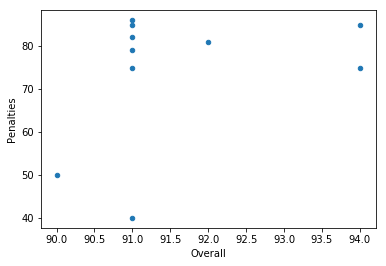

In [8]:
df_sorted = df.sort_values('Overall', ascending=False)[:10]
df_sorted.plot.scatter(x='Overall', y='Penalties')
plt.show()

In [9]:
df_mean = df.groupby('Club').mean()
df_mean.sort_values('Penalties', ascending=False, inplace=True)
df_mean = df_mean[:20]
print('Os times que contêm, em média, os melhores batedores de pênalti são:')
for i, (index, row) in enumerate(df_mean.iterrows()):
    print('\t{} - {} {:.2f}'.format(i+1, index, row['Penalties']))

Os times que contêm, em média, os melhores batedores de pênalti são:
	1 - Grêmio 60.70
	2 - Internacional 58.65
	3 - Atlético Mineiro 58.25
	4 - América FC (Minas Gerais) 57.95
	5 - Manchester United 57.85
	6 - Tottenham Hotspur 57.79
	7 - Santos 57.65
	8 - Fluminense 57.45
	9 - Liverpool 57.39
	10 - Cruzeiro 57.35
	11 - Vitória 57.35
	12 - Chapecoense 56.95
	13 - SL Benfica 56.75
	14 - FC Schalke 04 56.72
	15 - Juventus 56.60
	16 - Chelsea 56.42
	17 - Beşiktaş JK 56.25
	18 - Stoke City 56.20
	19 - Sport Club do Recife 56.05
	20 - FC Barcelona 56.03


In [10]:
df_mean = df.groupby('Club').mean()
df_mean.sort_values('Value', ascending=False, inplace=True)
df_mean = df_mean[:20]
print('Os times que contêm, em média, os jogadores mais caros são:')
for i, (index, row) in enumerate(df_mean.iterrows()):
    print('\t{} - {} {:,.0f}'.format(i+1, index, row['Value']))

Os times que contêm, em média, os jogadores mais caros são:
	1 - Juventus 28,179,000
	2 - Real Madrid 26,497,728
	3 - FC Barcelona 25,836,364
	4 - Manchester City 23,835,000
	5 - FC Bayern München 23,414,656
	6 - Paris Saint-Germain 20,844,166
	7 - Napoli 20,560,000
	8 - Atlético Madrid 19,531,060
	9 - Inter 19,436,876
	10 - Tottenham Hotspur 18,740,910
	11 - Chelsea 18,388,334
	12 - Manchester United 17,843,940
	13 - Liverpool 17,728,940
	14 - Milan 15,444,444
	15 - Arsenal 13,211,818
	16 - Roma 12,901,923
	17 - Borussia Dortmund 12,734,697
	18 - Bayer 04 Leverkusen 12,218,654
	19 - FC Porto 11,985,714
	20 - Valencia CF 11,946,212


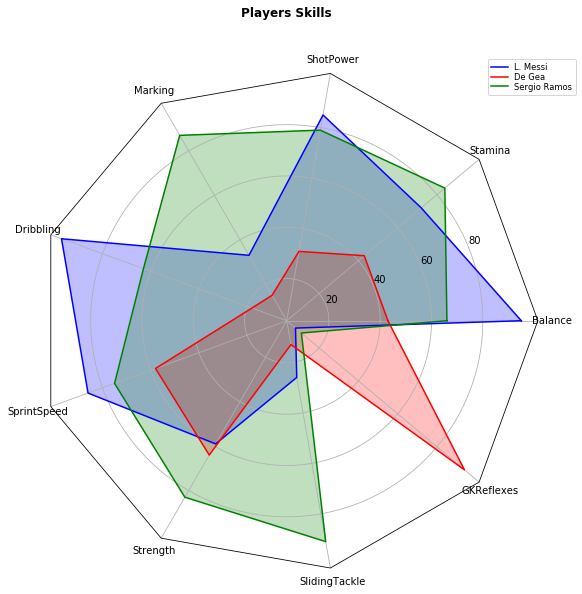

In [11]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
#     theta /= np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts




columns = ['Balance', 'Stamina', 'ShotPower', 
           'Marking', 'Dribbling', 'SprintSpeed', 
           'Strength', 'SlidingTackle', 'GKReflexes']
theta = radar_factory(len(columns), frame='polygon')

df_data = df[(df['Name'] == 'L. Messi') | 
                  (df['Name'] == 'Sergio Ramos') |
                  (df['Name'] == 'De Gea')]
names = df_data['Name'].values
df_data = df_data[columns]


fig, ax = plt.subplots(figsize=(9, 9), nrows=1, ncols=1,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g']

ax.set_rgrids([20, 40, 60, 80])
ax.set_title('Players Skills', weight='bold', size='large', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')

for (index, row), color in zip(df_data.iterrows(), colors):
    ax.plot(theta, row.values, color=color)
    ax.fill(theta, row.values, facecolor=color, alpha=0.25)
ax.set_varlabels(columns)

ax.legend(names, loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')
plt.show()